# Scale A. Wiedman coils

Source: Coil Optimization for Quasi-helically Symmetric Stellarator Configurations by A. Wiedman, S. Buller, M. Landreman

In [1]:
from simsopt.field import load_coils_from_makegrid_file
from simsopt.field import coils_via_symmetries, BiotSavart
from simsopt.geo import SurfaceRZFourier
from simsopt.mhd import Vmec

In [6]:
coils = load_coils_from_makegrid_file('coils.curves_22_7_21', order=10)
v = Vmec('input.vmec')
v2 = Vmec('input.LandremanPaul2021_QH')

base_curves = [c.curve for c in coils[:5]]
base_currents = [c.current for c in coils[:5]]
coils = coils_via_symmetries(base_curves, base_currents, v.boundary.nfp, True)

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
  VMEC OUTPUT FILES ALREADY EXIST: OVERWRITING THEM ...
  SEQ =    1 TIME SLICE  0.0000E+00
  PROCESSING INPUT.vmec
  THIS IS PARVMEC (PARALLEL VMEC), VERSION 9.0
  Lambda: Full Radial Mesh. L-Force: hybrid full/half.

  COMPUTER: arm64-apple-darwin20.0.0   OS:    RELEASE:   DATE = Feb 01,2024  TIME = 12:50:41
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
  SEQ =    1 TIME SLICE  0.0000E+00
  PROCESSING INPUT.LandremanPaul2021_QH
  THIS IS PARVMEC (PARALLEL VMEC), VERSION 9.0
  Lambda: Full Radial Mesh. L-Force: hybrid full/half.

  COMPUTER: arm64-apple-darwin20.0.0   OS:    RELEASE:   DATE = Feb 01,2024  TIME = 12:50:41


In [7]:
v.boundary.get('rc(0,0)') / v2.boundary.get('rc(0,0)')

13.67387682276575

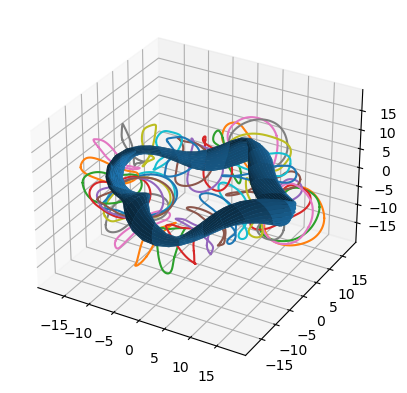

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
v.boundary.plot(ax=ax, close=True, show=False)
for c in coils:
    c.curve.plot(ax=ax, show=False)
plt.show()
%matplotlib widget

In [5]:
alpha

0.8318331340996343

In [4]:
# Scale everything
alpha = (450 / v.boundary.volume())**(1/3) # scale factor to match ku volume
scaled_boundary = SurfaceRZFourier( 
    nfp=v.boundary.nfp, stellsym=v.boundary.stellsym, mpol=v.boundary.mpol, ntor=v.boundary.ntor, 
    quadpoints_phi=np.linspace(0,1,256,endpoint=False),
    quadpoints_theta=np.linspace(0,1,256,endpoint=False)
)
scaled_boundary.full_x = v.boundary.full_x * alpha
v.boundary = scaled_boundary

# Also the coils
bs = BiotSavart(coils)
bs.x = bs.x * alpha

NameError: name 'np' is not defined

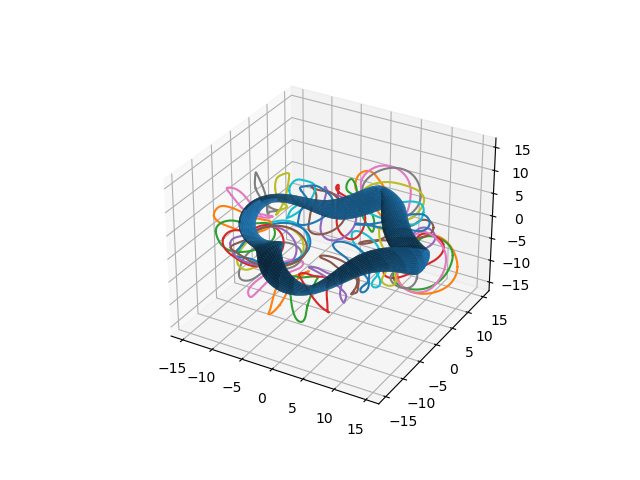

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
v.boundary.plot(ax=ax, close=True, show=False)
for c in coils:
    c.curve.plot(ax=ax, show=False)
plt.show()
%matplotlib widget

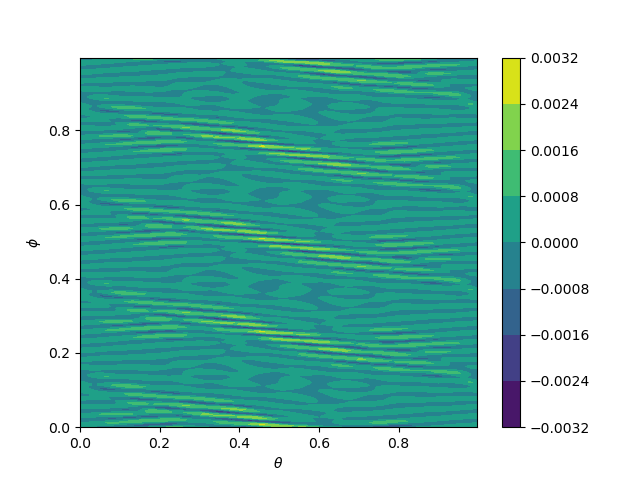

In [51]:
import numpy as np
surf = v.boundary
theta = surf.quadpoints_theta
phi = surf.quadpoints_phi
ntheta = theta.size
nphi = phi.size

fig, ax = plt.subplots()
bs.set_points(surf.gamma().reshape((-1,3)))
Bdotn = np.sum(bs.B().reshape((nphi, ntheta, 3)) * surf.unitnormal(), axis=2) 
B = bs.AbsB().reshape((nphi,ntheta))
ax.set_ylabel(r'$\phi$')
ax.set_xlabel(r'$\theta$')
c = ax.contourf(theta,phi,Bdotn/B)
plt.colorbar(c)

In [53]:
v.write_input('input.scaled')
bs.save('coils.wiedman.json')

'{\n  "@module": "simsopt._core.json",\n  "@class": "SIMSON",\n  "@version": "0.19.0.post0+gc859dfb3.d20230815.dirty",\n  "graph": {\n    "$type": "ref",\n    "value": "BiotSavart10"\n  },\n  "simsopt_objs": {\n    "11208664832": {\n      "@module": "simsopt._core.optimizable",\n      "@class": "DOFs",\n      "@name": "11208664832",\n      "@version": "0.19.0.post0+gc859dfb3.d20230815.dirty",\n      "x": {\n        "@module": "numpy",\n        "@class": "array",\n        "dtype": "float64",\n        "data": [\n          14.569926433702314,\n          -0.4187886932965798,\n          3.742220273686411,\n          -0.37903216773542564,\n          0.6428149582920977,\n          0.13293360155460887,\n          -0.3274343366730056,\n          -0.07479859961123682,\n          0.04152698393798209,\n          0.05149493764373999,\n          0.06626834173182752,\n          -0.04928014746284361,\n          -0.03851876741886632,\n          -0.006253037587579576,\n          -0.01915982485221906,\n 

In [54]:
from pystellplot.Paraview import coils_to_vtk, surf_to_vtk
coils_to_vtk( coils, "wiedman_coils" )
surf_to_vtk( "wiedman_surf", bs, surf )

In [55]:
alpha

0.8318331340996343